In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.stats import rankdata
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:

data = pd.read_csv('dataset2.csv', sep=';', skipinitialspace=True)

# convertir columnas a numericas
data['Res_max_comp_kpsi'] = pd.to_numeric(data['Res_max_comp_kpsi'], errors='coerce')
data['Res_max_comp_Mpa'] = pd.to_numeric(data['Res_max_comp_Mpa'], errors='coerce')

# columnas no numericas son del dataframe numerico
columnas_nonum = data.select_dtypes(exclude=['number']).columns
num_data = data.drop(columns=columnas_nonum)

# tratamiento de valores nulos en los datos numericos
imputer = SimpleImputer(strategy='mean')
num_data_imputed = imputer.fit_transform(num_data)

# escalado
scaler = StandardScaler()
scaled_data_imputed = scaler.fit_transform(num_data_imputed)


In [3]:
#outliers utilizando Z-score
z_scores = np.abs(stats.zscore(scaled_data_imputed))
threshold = 3
outliers = np.where(z_scores > threshold)

#remover outliers
filtered_data = scaled_data_imputed[(z_scores < threshold).all(axis=1)]

In [4]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(filtered_data)
    inertia.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

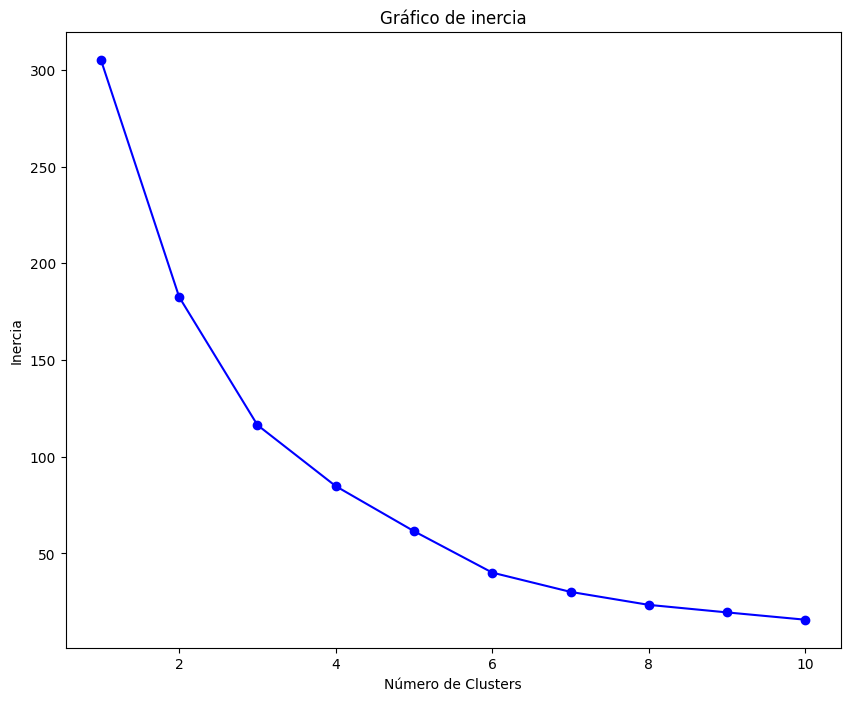

In [5]:
plt.figure(figsize=(10, 8))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Gráfico de inercia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

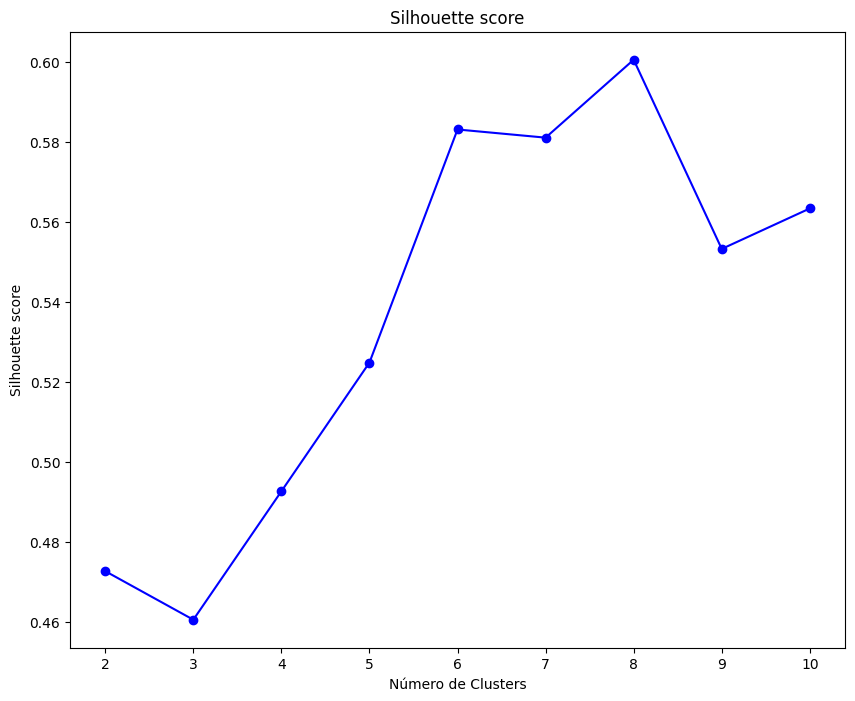

In [6]:
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(filtered_data)
    score = silhouette_score(filtered_data, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 8))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score')
plt.show()


In [7]:
n_clusters =8 # numero de clusters a utilizar
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(filtered_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=0)

In [8]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(filtered_data)
data_2d_with_clusters = pd.DataFrame(data_2d, columns=['PC1', 'PC2'])
data_2d_with_clusters['Cluster'] = kmeans.labels_

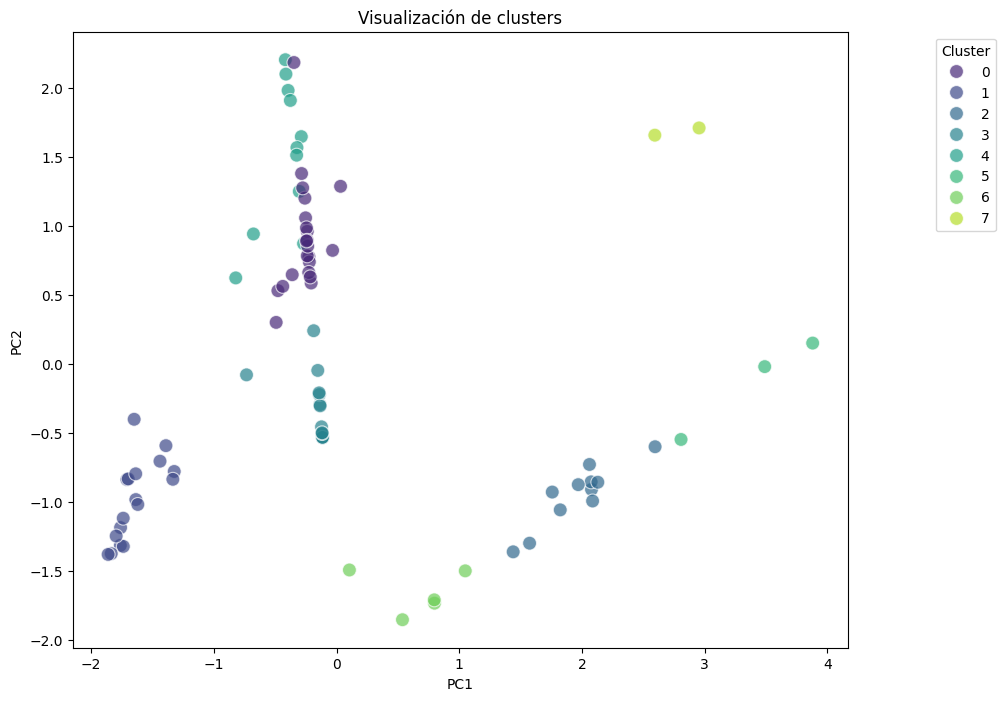

In [9]:
plt.figure(figsize=(10, 8))
palette = sns.color_palette("viridis", as_cmap=False, n_colors=8)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data_2d_with_clusters, palette=palette, s=100, alpha=0.7)
plt.title('Visualización de clusters')
plt.legend(title='Cluster', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [12]:
total_samples = 9600 # numero de muestras deseadas
num_samples_por_cluster = total_samples // 8

# Generar datos sintéticos
sint_data = []

for i in range(8):
    cluster_data = filtered_data[kmeans.labels_ == i]
    cluster_mean = cluster_data.mean(axis=0)
    cluster_cov = np.cov(cluster_data, rowvar=False)
    sint_samples = np.random.multivariate_normal(cluster_mean, cluster_cov, num_samples_por_cluster)
    sint_data.append(sint_samples)

sint_data = np.vstack(sint_data)


sint_data_descaled = scaler.inverse_transform(sint_data)

# cambiar valores negativos a 0 y aproximar la columna tipo
sint_data_descaled[sint_data_descaled < 0] = 0
tipo_column_index = num_data.columns.get_loc('Tipo')
sint_data_descaled[:, tipo_column_index] = np.round(sint_data_descaled[:, tipo_column_index])

# crear un dataframe con los datos sinteticos
sint_df = pd.DataFrame(sint_data_descaled, columns=num_data.columns)
print(sint_df)
sint_df.to_csv('synthetic_data.csv', index=False)

      mod_elasticidad_aproximado_Mpsi  mod_elasticidad_aproximado_Gpa  \
0                            3.468461                       23.896031   
1                            2.958874                       20.386787   
2                            1.987584                       13.710500   
3                            2.464795                       17.045674   
4                            3.296226                       22.761247   
...                               ...                             ...   
9595                         2.490000                       17.200000   
9596                         2.490000                       17.200000   
9597                         2.490000                       17.200000   
9598                         2.490000                       17.200000   
9599                         2.490000                       17.200000   

      Res_max_tension_kpsi  Res_max_tension_Mpa  Res_max_comp_kpsi  \
0                 7.741072            53.395654      

In [13]:
data = pd.read_csv('dataset2.csv', sep=';', skipinitialspace=True)

numeric_data=data.drop("Material",axis=1)
for col in data.columns:
     data[col] = pd.to_numeric(data[col], errors='coerce')
col= numeric_data.columns.intersection(sint_df.columns)
df_final = pd.concat([numeric_data[col], sint_df[col]], axis=0)
df_final.to_csv('data_final.csv', index=False)
print(df_final.head())

   mod_elasticidad_aproximado_Mpsi  mod_elasticidad_aproximado_Gpa  \
0                              0.3                             2.1   
1                              0.6                             4.1   
2                              0.5                             3.4   
3                              1.0                             6.9   
4                              0.4                             2.8   

   Res_max_tension_kpsi  Res_max_tension_Mpa Res_max_comp_kpsi  \
0                   6.0                 41.4              10.0   
1                  10.0                 68.9              12.0   
2                   8.8                 60.7              18.0   
3                  10.0                 68.9              18.0   
4                  10.0                 68.9              15.0   

  Res_max_comp_Mpa  Tipo  
0             68.9   0.0  
1             82.7   0.0  
2            124.1   0.0  
3            124.1   0.0  
4            103.4   0.0  


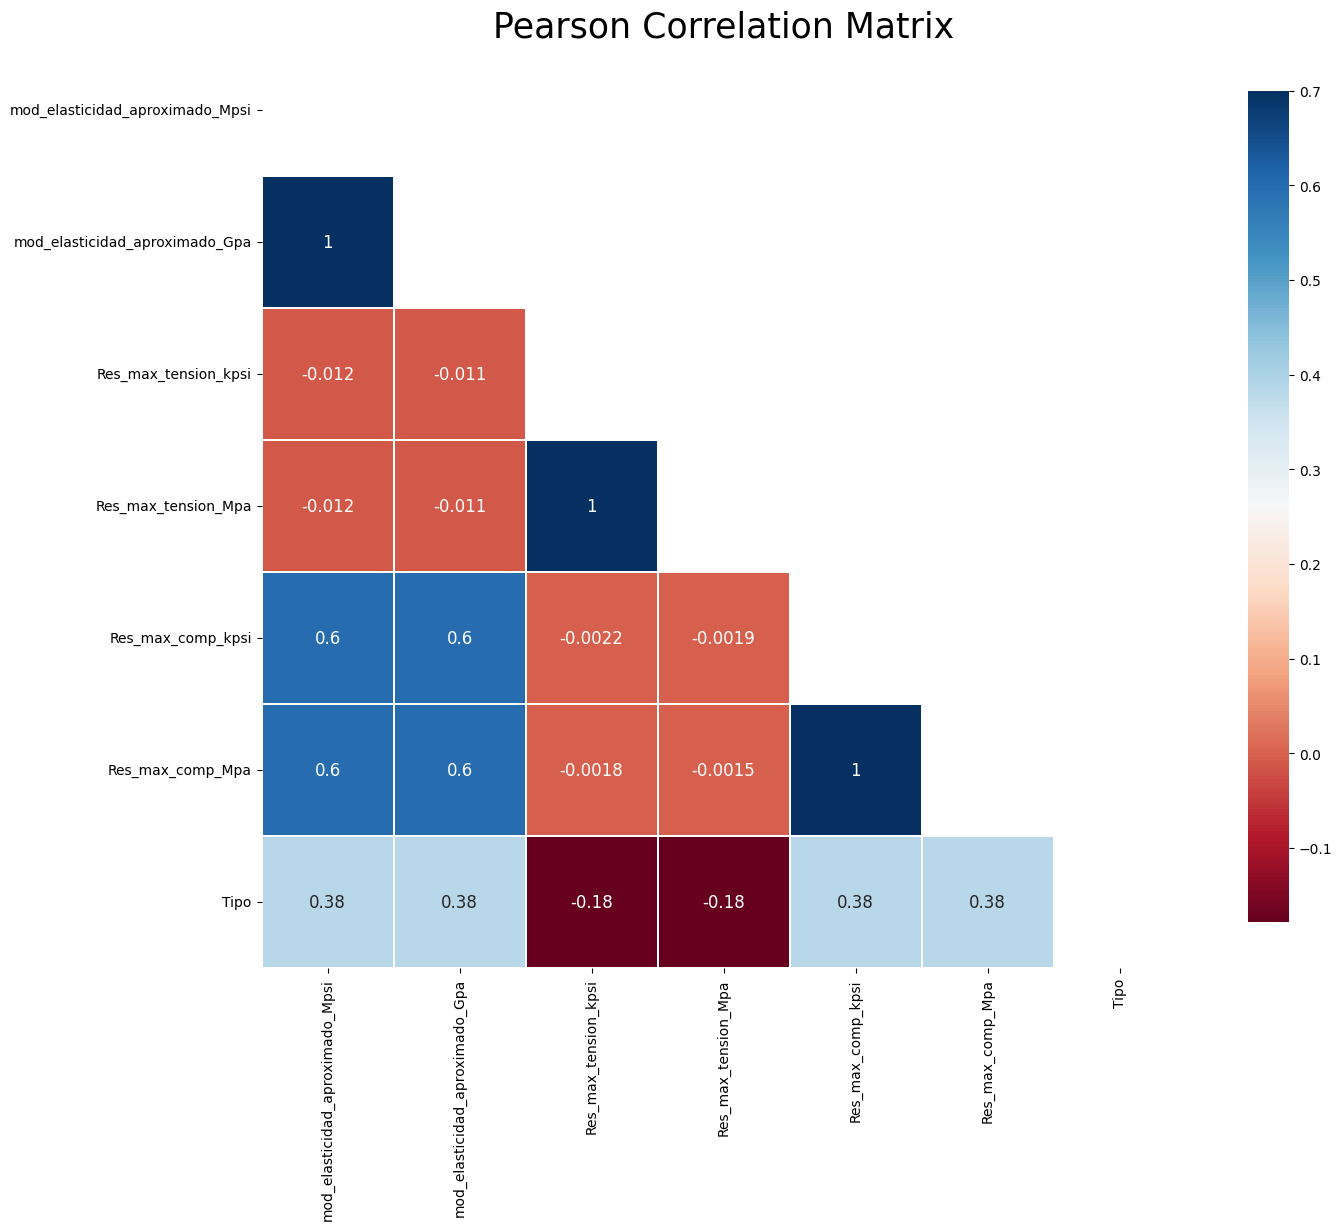

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('data_final.csv')

for col in data.columns:
     data[col] = pd.to_numeric(data[col], errors='coerce')
numerical_data = data.select_dtypes(include=[np.number])

mask = np.zeros_like(numerical_data.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(numerical_data.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="RdBu",
            linecolor='w',annot=True,annot_kws={"size":12},mask=mask,cbar_kws={"shrink": .9});

In [15]:
data = pd.read_csv('data_final.csv')
target_columns = ['mod_elasticidad_aproximado_Mpsi', 'mod_elasticidad_aproximado_Gpa']
X = data.drop(columns=target_columns).values
y = data[target_columns].values #variables objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.isnan(y_test).sum())

0


In [16]:
X_train_numeric = np.where(X_train == '-', np.nan, X_train)
X_train_numeric = X_train_numeric.astype(np.float64)  # tratamiento de datos problematicos

mask = ~np.isnan(X_train_numeric).any(axis=1)
X_train_numeric = X_train_numeric[mask]
y_train = y_train[mask]
print(np.isnan(X_train_numeric).sum())

0


In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') #rellenar valores faltantes (en caso de existir despues de la generacion) con el promedio
X_train_imputed = imputer.fit_transform(X_train_numeric)


X_test_numeric = np.where(X_test == '-', np.nan, X_test)
X_test_numeric = X_test_numeric.astype(np.float64)

X_test_imputed = imputer.transform(X_test_numeric)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [21]:
model = MLPRegressor(hidden_layer_sizes=(400,300,200,100), activation='relu', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(400, 300, 200, 100), max_iter=1000,
             random_state=42)

In [22]:
y_pred = model.predict(X_test_scaled)

In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

MSE: 164.41
R2: 0.52


In [ ]:
print(y_pred)
column_names = ['mod_elasticidad_aproximado_Mpsi','Res_max_tension_Mpa']
y_pred_df = pd.DataFrame(data=y_pred, columns=column_names)
y_pred_df.to_csv('resultados_prediccion_clusters.csv', index=False)

[[ 0.49004965  3.64912558]
 [ 0.36358837  2.77087337]
 [10.32113916 70.7631088 ]
 ...
 [ 0.40055102  3.08681456]
 [ 0.21099304  1.59746255]
 [ 0.26817508  2.04897037]]


In [ ]:
hidden_layer_configurations = [
    (10),(10,10),(20),(30),(40), (50), (60), (64,32) , (100,), (200,), (300,),
    (100, 50), (200, 100), (300, 150),
    (100, 50, 25), (200, 100, 50), (300, 150, 75), (350,100), (400,100),(500,100),(1000),(1500),(2000), (3000)
]


results = []

for config in hidden_layer_configurations:

    model = MLPRegressor(hidden_layer_sizes=config, activation='relu', max_iter=2000, random_state=42)

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'hidden_layers': config,
        'MSE': mse,
        'R2': r2
    })


results_df = pd.DataFrame(results)

results_df.to_csv('results_clusters.csv', sep=',', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Los resultados han sido guardados en 'results.csv'
